In [1]:
import os
os.environ["SPS_HOME"] = "/Users/fpetri/packages/fsps" 

In [2]:
import numpy as np
import lbg_forecast.tools as tools

In [3]:
i = 0
tot_runs = 10
sps_params = []
photometry = []

while(i < tot_runs):

    sps_params.append(np.load("data/data/run"+str(i)+"generated_spsparams.npy"))
    photometry.append(np.load("data/data/run"+str(i)+"generated_photo_final.npy"))
    i+=1

sps_params = np.asarray(sps_params)
photometry = np.asarray(photometry)

In [4]:
sps_params = np.vstack(sps_params)
photometry = np.vstack(photometry)
print(sps_params.shape, photometry.shape)

(10000000, 15) (10000000, 10)


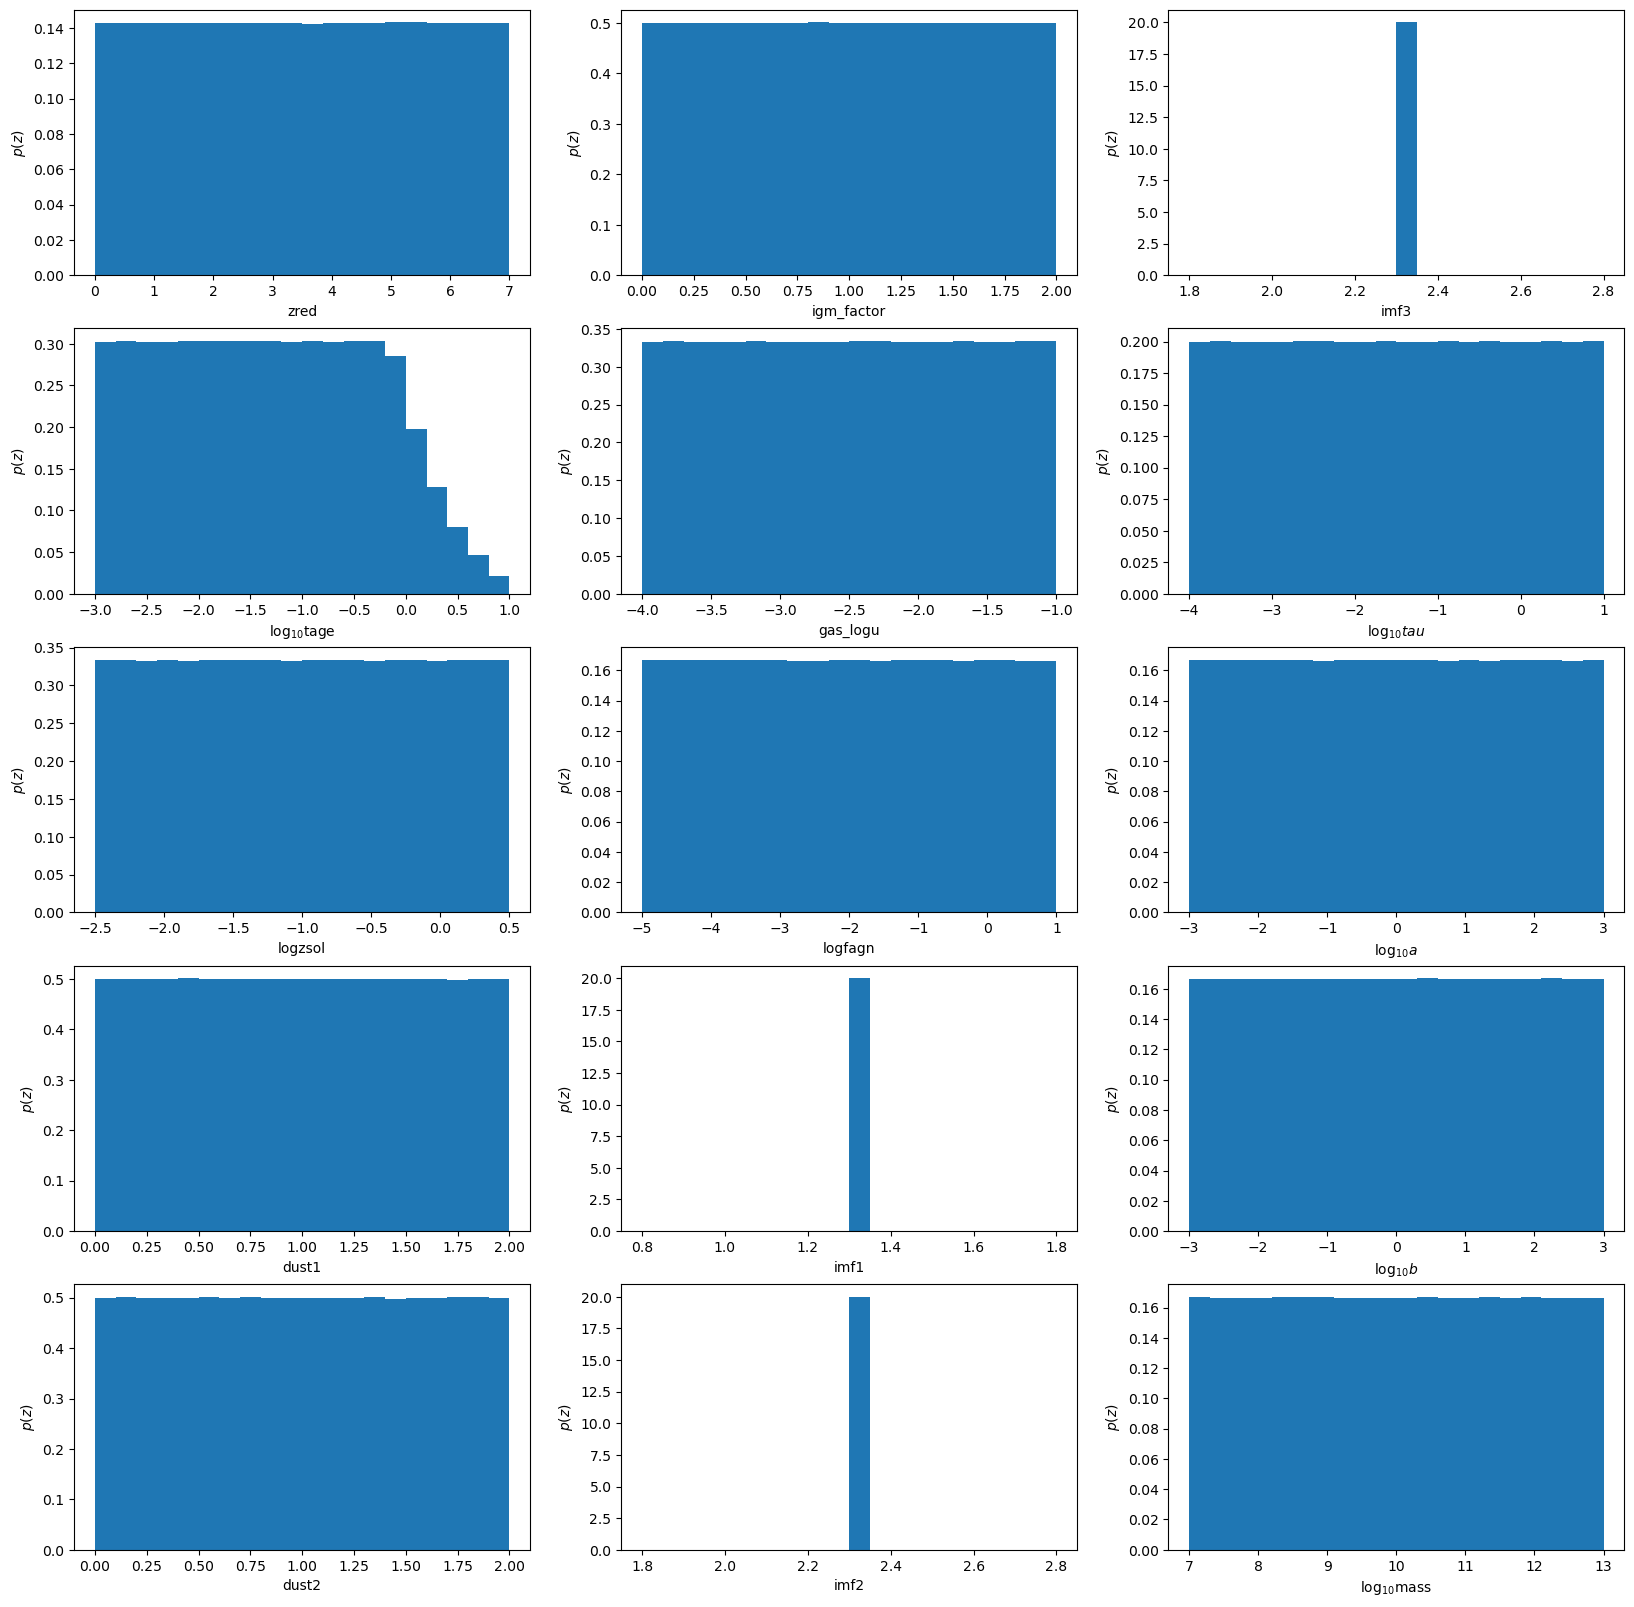

In [5]:
tools.plot_galaxy_population(sps_params)

In [6]:
i = 0
while(i < tot_runs):
    np.testing.assert_equal(np.load("data/data/run"+str(i)+"generated_spsparams.npy"), sps_params[int(i*1e6):int((i+1)*1e6)])
    np.testing.assert_equal(np.load("data/data/run"+str(i)+"generated_photo_final.npy"), photometry[int(i*1e6):int((i+1)*1e6)])
    i+=1


In [7]:
np.save("data/data/training_params.npy", sps_params)
np.save("data/data/training_data.npy", photometry)